In [2]:
import os
import keras
import numpy as np
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import librosa
import librosa.display as display

Using TensorFlow backend.


In [3]:
#A function that generates the MFCC matrix from raw music data.
def generate_mfcc_matrix(music_file_path):
    y, sr = librosa.core.load(music_file_path)
    return librosa.feature.mfcc(y, sr)
mfcc_feature = generate_mfcc_matrix('genres/rock/rock.00005.wav')
mfcc_feature.shape

(20, 1293)

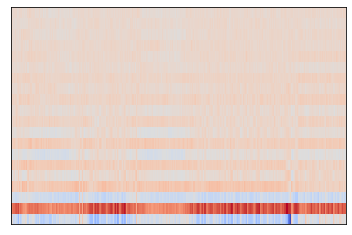

In [4]:
display.specshow(mfcc_feature[:25])

In [5]:
#generates a 20 x 1290 MFCC matrix for each song in this directory.
#todo: maybe change the matrix size?
def process_sub_directory(path):
    result = []
    for root, dirs, files in os.walk (path):
        for file_name in files:
            file_path = root + file_name
            result += [generate_mfcc_matrix(file_path)[:20, :1290]]
    len_set = set(music.shape for music in result)
    return np.array(result)
blues = process_sub_directory('genres/blues/')
blues.shape

(100, 20, 1290)

In [14]:
def process_directory(path):
    sub_dirs = os.listdir(path)
    print(sub_dirs)
    c = 10
    X = np.empty((0, 20, 1290))
    Y = np.empty((0, c))
    j = 0
    for i in range(len(sub_dirs)):
        #print('processing genre {0}'.format(sub_dirs[i]))
        if sub_dirs[i] in ['classical', 'hiphop', 'metal', 'pop', 'blues']:
            X_is = process_sub_directory('genres/{0}/'.format(sub_dirs[i]))
            X = np.concatenate((X, X_is), axis=0)
            Y_is = np.zeros((X_is.shape[0], c))
            Y_is[:, j] = 1
            Y = np.concatenate((Y, Y_is), axis=0)
            j += 1
    return X, Y

X, Y = process_directory('genres/')
Y

['me.mf', 'pop', '.DS_Store', 'ja.mf', 'metal', 'disco', 'blues', 'di.mf', 'bl.mf', 'cl.mf', 'reggae', 'classical', 'po.mf', 'ro.mf', 'input.mf', 'hi.mf', 'rock', 'hiphop', 'co.mf', 'bextract_single.mf', 're.mf', 'country', 'jazz']


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X.shape

(500, 20, 1290)

In [ ]:
# inds = np.arange(X.shape[0])
# # np.random.shuffle(inds)
# # print(inds)
# X_train, X_test, Y_train, Y_test = ms.train_test_split(X[inds], Y[inds], test_size=0.2, random_state=123)
# print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
# np.save('mfcc_vals/X_test.npy', X_test)
# np.save('mfcc_vals/X_train.npy', X_train)
# np.savetxt('mfcc_vals/Y_test.txt', Y_test)
# np.savetxt('mfcc_vals/Y_train.txt', Y_train)

In [15]:
#np.save('data_mat/X_10.npy', X)
#np.save('data_mat/Y_10.npy', Y)
np.save('data_mat/X_5.npy', X)
np.save('data_mat/Y_5.npy', Y)